# Graded Assignment 01: Titanic: Machine Learning from Disaster
2017-05-17

(c) Marisa Nest 2017

## Imports

In [2]:
import csv
import re
import pandas as pd
from pandas import *
import numpy
from numpy import *
import math
%matplotlib inline
import matplotlib.pyplot as plt
from random import randint

## Feature-Extraktion

Als erstes wird sich mit der Feature-Extraktion beschäftigt, bei der es darum geht, dem Datensatz die Eigenschaften zu entnehmen, die dafür einscheident sind, ob eine Instanze einer bestimmten Klasse (0 oder 1, bzw. überlebt oder nicht überlebt) zugehört oder nicht.

### Funktionen zur Feature-Extraktion

**features**

Die Funktion features extrahiert bestimmte Eigenschaften einer Instanze, die wichtig sind um zu bestimmen, welcher Klasse die Instanz zugehört. Dafür bekommt sie als Übergabeparamter eine Instanz (instance), von welcher die Eigenschaften extrahiert werden sollen und einen boolischen Wert (train), welcher besagt, ob es sich um eine Trainings-Instanz oder eine Test-Instanz handelt und somit die Klasse (0 oder 1, bzw. überlebt oder nicht überlebt) der Instanz mit extrahiert wird oder nicht.

Folgende Features werden dabei extrahiert:
* Pclass: Ticket-Klassse
* Title: Titel
* Rev: Kommt 'Rev.' im Namen vor
* Jr: Kommt 'Jr' im Namen vor
* Sex: Geschlecht
* Age: Alter
* SibSp: Anzahl von Geschwistern / Ehepartnern auf der Titanic 
* Parch: Anzahl von Kindern / Eltern auf der Titanic
* SingleTicketNumber: Ist die Ticket-Nummer nur an eine Person vergeben worden 
* TicketPrefix: Ticket-Prefix
* Fare: Ticket-Preis
* Cabin: Kabine
* Embarked: Hafen der Anbordnahme

Das Feature SingleTicketNumber wurde im laufe der Bearbeitung der Aufgabe raus genommen, da dieses Feature nicht richtig extrahiert werden kann, da nicht alle vergebenen Ticket-Nummern bekannt sind und man somit nicht sicher sagen kann, ob eine Ticket-Nummer nur an eine Person vergeben wurde oder nicht. Dennoch wird es hier der Vollständigkeit halber mit aufgelistet.

In [3]:
def features(passenger, train=False):
    features = {}
    features['Pclass'] = passenger['Pclass']
    features['Title'] = getTitle(passenger['Name'])
    features['Rev'] = 'Rev' in passenger['Name']
    features['Jr'] = 'Jr' in passenger['Name']
    features['Sex'] = passenger['Sex']
    features['Age'] = getAgeClass(getAge(passenger['Age']))
    features['SibSp'] = passenger['SibSp']
    features['Parch'] = passenger['Parch']
    #features['SingleTicketNumber'] = isSingleTicketNumber(passenger['Ticket'], ticket_number_df)
    features['TicketPrefix'] = getTicketPrefix(passenger['Ticket'])
    features['Fare'] = getFareClass(getFare(passenger['Fare']))
    features['Cabin'] = getCabinPrefix(passenger['Cabin'])
    features['Embarked'] = passenger['Embarked']
    if train == True:
        features['Class'] = int(passenger['Survived'])
    
    return features

**randomFeatures**

Die Funktion randomFeatures extrahiert bestimmte, zufällige Eigenschaften einer Instanze, die wichtig sind um zu bestimmen, welcher Klasse die Instanz zugehört.
Dafür bekommt sie als Übergabeparamter eine Instanz (instance), von welcher die Eigenschaften extrahiert werden sollen, eine Reihe von zufälligen Zahlen (random_numbers), welche darüber entscheiden, welche Eigenschaften der Instanz ausgewählt werden und einen booloschen Wert (train), welcher besagt, ob es sich um eine Trainings-Instanz oder nicht handelt und somit die Klasse (0 oder 1, bzw. überlebt oder nicht überlebt) der Instanz mit extrahiert wird oder nicht.

Folgende Features können dabei extrahiert werden:
* Pclass: Ticket-Klassse
* Title: Titel
* Rev: Kommt 'Rev.' im Namen vor
* Jr: Kommt 'Jr' im Namen vor
* Sex: Geschlecht
* Age: Alter
* SibSp: Anzahl von Geschwistern / Ehepartnern auf der Titanic 
* Parch: Anzahl von Kindern / Eltern auf der Titanic
* SingleTicketNumber: Ist die Ticket-Nummer nur an eine Person vergeben worden 
* TicketPrefix: Ticket-Prefix
* Fare: Ticket-Preis
* Cabin: Kabine
* Embarked: Hafen der Anbordnahme

Das Feature SingleTicketNumber wurde im laufe der Bearbeitung der Aufgabe raus genommen, da dieses Feature nicht richtig extrahiert werden kann, da nicht alle vergebenen Ticket-Nummern bekannt sind und man somit nicht sicher sagen kann, ob eine Ticket-Nummer nur an eine Person vergeben wurde oder nicht. Dennoch wird es hier der Vollständigkeit halber mit aufgelistet.

In [4]:
def randomFeatures(instance, random_numbers, train=False):
    features = {}
    if train == True:
        features['Class'] = int(instance['Survived'])
    for random_number in random_numbers:
        if random_number == 0:
            features['Pclass'] = instance['Pclass']
        elif random_number == 1:
            features['Title'] = getTitle(instance['Name'])
        elif random_number == 2:
            features['Rev'] = 'Rev' in instance['Name']
        elif random_number == 3:
            features['Jr'] = 'Jr' in instance['Name']
        elif random_number == 4:
            features['Sex'] = instance['Sex']
        elif random_number == 5:
            features['Age'] = getAgeClass(getAge(instance['Age']))
        elif random_number == 6:
            features['SibSp'] = instance['SibSp']
        elif random_number == 7:
            features['Parch'] = instance['Parch']
        #elif random_number == 8:
            #features['SingleTicketNumber'] = isSingleTicketNumber(passenger['Ticket'], ticket_number_df)
        elif random_number == 8:
            features['TicketPrefix'] = getTicketPrefix(instance['Ticket'])
        elif random_number == 9:
            features['Fare'] = getFareClass(getFare(instance['Fare']))
        elif random_number == 10:
            features['Cabin'] = getCabinPrefix(instance['Cabin'])
        elif random_number == 11:
            features['Embarked'] = instance['Embarked']
    return features

### Hilfs-Funktionen zur Feature-Extraktion

Die folgenden Funktionen dienen den beiden Funktionen features und randomFeatures als Hilfe, um die Features besser extrahieren zu können. 

**getTitle**

Die Funktion getTitle bekommt einen String (name) übergeben und prüft, ob in dem String ein Titel vorkommt und gibt diesen Titel dann zurück. Mögliche Titel sind dabei 'Miss', 'Mrs', 'Master' und 'Mr'. Sollte keiner der Titel vorkommen wird 'none' zurückgegeben, sollte der String leer sein wird 'unknown' zurückgegeben. 

In [5]:
def getTitle(name):
    if name == '':
        return 'unknown'
    elif 'Miss' in name:
        return 'Miss'
    elif 'Mrs' in name:
        return 'Mrs'
    elif 'Master' in name:
        return 'Master'
    elif 'Mr' in name:
        return 'Mr'
    else:
        return 'none'

**getAge**

Die Funktion getAge bekommt einen String (age) übergeben und prüft, ob der String leer ist. Ist dies der Fall wird -1 zurückgegeben, ansonsten wird der String erst zu einer Float-Zahl gecastet und anschließend zu einem Integer, um so eine sinnvolle Rundung vorzunehmen.

In [6]:
def getAge(age):
    if age == '':
        return -1
    else:
        return int(float(age))

**getAgeClass**

Die Funktion getAgeClass bekommt eine Integer-Zahl (age) übergeben und ordnet diese Zahl einer vordefinierten Klasse zu. Die Klassen sind dabei wie folgt eingeteilt: 
* 'unknown': age == -1
* 'child': age >= 0 and age <= 15
* 'young person': age > 15 and age <= 23
* 'young adult': age > 23 and age <= 36
* 'adult': age > 36 and age <= 54
* 'old adult': age > 54 and age <= 63
* 'old person': age > 63
* alles was keiner dieser Klassen zugeordnet werden kann ist 'undefined'

Um die Klassen sinnvoll festlegen zu können, wurden als erstes alle Alters-Daten in der Rohform und nach dem Casting zum Interger graphisch visualisiert. 

In [7]:
def getAgeClass(age):
    if age == -1:
        return 'unknown'
    elif age >= 0 and age <= 15:
        return 'child'
    elif age > 15 and age <= 23:
        return 'young person'
    elif age > 23 and age <= 36:
        return 'young adult'
    elif age > 36 and age <= 54:
        return 'adult'
    elif age > 54 and age <= 63:
        return 'old adult'
    elif age > 63:
        return 'old person'
    else:
        return 'undefined'

**getTicketPrefix**

Die Funktion getTicketPrefix bekommt einen String (ticket) übergeben und parst aus diesem das Prefix heraus. Das Perfix definiert sich dabei als der Teil, der vor der eigentlichen Ticket-Nummer steht. Sollte der String leer sein oder nur aus der Zeichenkette 'LINE' bestehen, wird beim ersten Fall 'unknown' und beim zweiten Fall 'LINE' zurückgegeben. Ansonsten werden Sonderzeichen wie Punkte, Leerzeichen und Back-Slashes aus dem String heraus geparst. Der resultierende String wird zurückgegeben, außer er ist leer, dann wird 'none' zurückgegeben.

In [8]:
def getTicketPrefix(ticket):
    if ticket == '':
        return 'unknown'
    else:
        if ticket == 'LINE':
            return ticket
        else:
            ticket = ticket.upper()
            ticket = re.sub(r"[0-9]*$", "", ticket)
            ticket = re.sub(r"\.", "", ticket)
            ticket = re.sub(r"\s*", "", ticket)
            ticket = re.sub(r"\/*", "", ticket)
            if ticket != '':
                return ticket
            else:
                return 'none'

#### getFare
Die Funktion getFare bekommt einen String (fare) übergeben und prüft, ob der String leer ist. Ist dies der Fall wird -1 zurückgegeben, ansonsten wird der String erst zu einer Float-Zahl und anschließend zu einem Integer gecastet, um so eine sinnvolle Rundung vorzunehmen.

In [9]:
def getFare(fare):
    if fare == '':
        return -1
    else:
        return int(float(fare))

**getFareClass**

Die Funktion getFareClass bekommt eine Integer-Zahl (fare) übergeben und ordnet diese Zahl einer vordefinierten Klasse zu. Die Klassen sind dabei wie folgt eingeteilt:
* 'unknown': age == -1
* 'cheap': fare >= 0 and fare <= 10
* 'economical': fare > 10 and fare <= 26
* 'normal': fare > 26 and fare <= 50
* 'expensive': fare > 50 and fare <= 79
* 'first class': fare > 79
* alles was keiner dieser Klassen zugeordnet werden kann ist 'undefined'

Um die Klassen sinnvoll festlegen zu können, wurden als erstes alle Fare-Daten in der Rohform und nach dem Casting zum Interger graphisch visualisiert.

In [10]:
def getFareClass(fare):
    if fare == -1:
        return 'unknown'
    elif fare >= 0 and fare <= 10:
        return 'cheap'
    elif fare > 10 and fare <= 26:
        return 'economical'
    elif fare > 26 and fare <= 50:
        return 'normal'
    elif fare > 50 and fare <= 79:
        return 'expensive'
    elif fare > 79:
        return 'first class'
    else:
        return 'undefined'

**getCabinPrefix**

Die Funktion getCabinPrefix bekommt einen String (cabin) übergeben und parst aus diesem das Prefix heraus. Das Perfix definiert sich dabei als der Teil, der vor der eigentlichen Kabinien-Nummer steht. Sollte der String leer sein, wird 'unknown' zurückgegeben. Ansonsten werden alle Leerzeichen und alle Zahlen, die am Ende stehen, heraus geparst. Der resultierende String wird zurückgegeben, außer er ist leer, dann wird 'none' zurückgegeben.

In [11]:
def getCabinPrefix(cabin):
    if cabin == '':
        return 'unknown'
    else:
        cabin = re.sub(r"\s*", "", cabin)
        cabin = re.sub(r"[0-9]*$", "", cabin)
        if cabin != '':
            return cabin
        else:
            return 'none'

**initTicketNumberDf**

Die Funktion initTicketNumberDf erzeugt ein Dataframe mit allen bekannten Ticket-Nummern (ohne Prefix, das wird zuvor raus geparst) und gibt dieses zurück.

In [12]:
def initTicketNumberDf():
    arr = []
    with open('train.csv') as csvfile: 
        csv_dict = csv.DictReader(csvfile, delimiter=',', quotechar='"')
        ([arr.append(row['Ticket']) for row in csv_dict])
    
    regex_alp = re.compile(r"[a-zA-Z]*", re.IGNORECASE)
    regex_pun = re.compile(r"\.", re.IGNORECASE)
    regex_sla = re.compile(r"\/", re.IGNORECASE)
    regex_num = re.compile(r"^[0-9]* ", re.IGNORECASE)
    regex_spa = re.compile(r"\s*", re.IGNORECASE)
    
    new_arr = []
    for row in arr: 
        tmp_row = regex_alp.sub("", row)
        tmp_row = regex_pun.sub("", tmp_row)
        tmp_row = regex_sla.sub("", tmp_row)
        tmp_row = regex_num.sub("", tmp_row)
        tmp_row = regex_spa.sub("", tmp_row)
        if tmp_row != '':
            new_arr.append(tmp_row)
    

    df = pd.DataFrame(new_arr)
    df = df.apply(pd.value_counts)
    return df

**isSingleTicketNumber**

Die Funktion isSingleTicketNumber bekommt ein String (ticket) übergeben, ist dieser String leer, wird 'unknown' zurück gegeben, ansonsten wird die Ticket-Nummer aus dem Ticket geparst. Anschließend wird in dem ebenfalls übergebenen DataFrame ticket_number_df geguckt, ob die Nummer bereits existiert oder nicht. Jenachdem wird True oder False zurückgegeben. Sollte nach dem Parsen nur noch ein leerer String übrig sein, so wird 'none' zurückgegeben 

In [13]:
def isSingleTicketNumber(ticket, ticket_number_df):
    if ticket == '':
        return 'unknown'
    else:
        ticket = re.sub(r"[a-zA-Z]*", "", ticket)
        ticket = re.sub(r"\.", "", ticket)
        ticket = re.sub(r"\/", "", ticket)
        ticket = re.sub(r"^[0-9]* ", "", ticket)
        ticket = re.sub(r"\s*", "", ticket)
        if ticket != '':
            return (int((ticket_number_df.loc[ticket, :])[0]) == 1)
        else:
            return 'none' 

### Plots zur Visualisierung der extrahierten Features

Die folgeneden Plots sind dazu da, um sich ein Bild darüber zu machen, wie entscheidend ein bestimmtes Feature ist, wenn es darum geht, ob ein Passagier überlebt hat oder nicht. Bei der Bearbeitung der Aufgabe, wurd bei der Feature-Extraktion verschiedenes ausprobiert und anschließend durch die Plots geprüft.

Die Plots sind dabei so aufgebaut, dass an der x-Achse alle Ausprägungen eines Features zu finden sind. Für jede Ausprägung eines Features gibt es dann jeweils zwei Balken: Der blaue Balken für die Pasagiere, die die Auspägung hatten und nicht überlebt haben und der orange Balken für die Pasagiere, die die Auspägung hatten und überlebt haben. Die y-Achse gibt an, wie viele Pasagiere mit einer bestimmten Ausprägung jeweils überlebt oder nicht überlebt haben.

**Vorbereitung**
der beiden Datensätze survived und not_survived, welche einemal alle überlebenden Passagiere und einmal alle nicht überlebenden Passagiere beinhalten.

In [14]:
train_dict = csv.DictReader(open('train.csv', 'r'))
train_df = DataFrame([features(p, True) for p in train_dict])

survived = train_df.query('Class==1')
not_survived =  train_df.query('Class==0')

**Pclass**-Balken-Diagramm

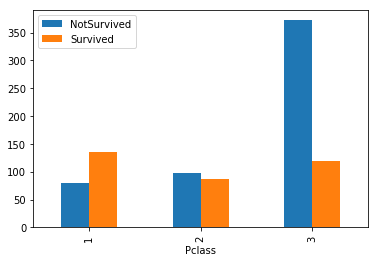

In [15]:
x = DataFrame({"Survived": Series(survived.groupby(['Pclass']).size()), "NotSurvived": Series(not_survived.groupby(['Pclass']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**Name**

**Title**-Balken-Diagramm

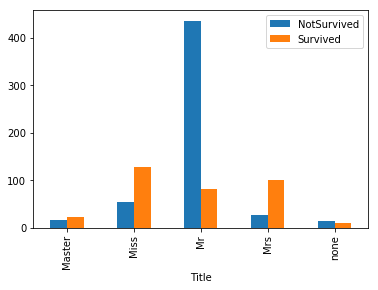

In [16]:
x = DataFrame({"Survived": Series(survived.groupby(['Title']).size()), "NotSurvived": Series(not_survived.groupby(['Title']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**Rev**-Balken-Diagramm

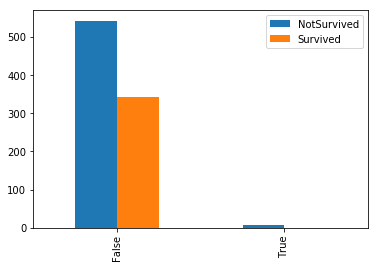

In [17]:
x = DataFrame({"Survived": Series(survived.groupby(['Rev']).size()), "NotSurvived": Series(not_survived.groupby(['Rev']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**Jr**-Balken-Diagramm

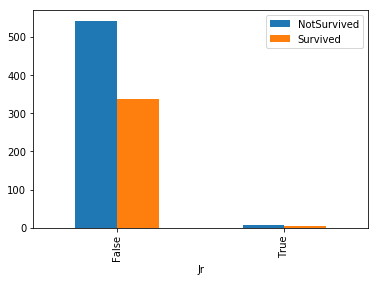

In [18]:
x = DataFrame({"Survived": Series(survived.groupby(['Jr']).size()), "NotSurvived": Series(not_survived.groupby(['Jr']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**Sex**-Balken-Diagramm

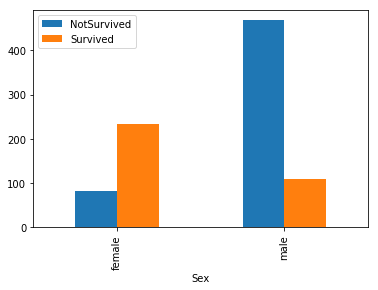

In [19]:
x = DataFrame({"Survived": Series(survived.groupby(['Sex']).size()), "NotSurvived": Series(not_survived.groupby(['Sex']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**Age**-Balken-Diagramm

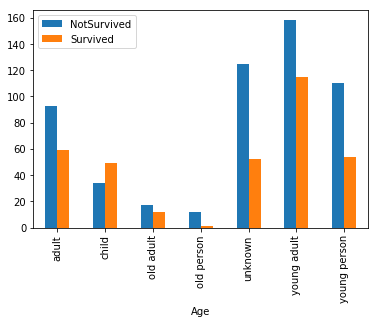

In [20]:
x = DataFrame({"Survived": Series(survived.groupby(['Age']).size()), "NotSurvived": Series(not_survived.groupby(['Age']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**SibSp**-Balken-Diagramm

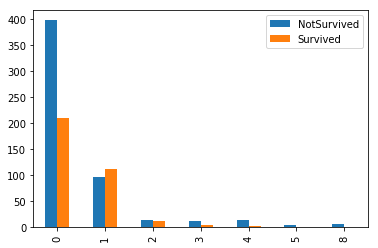

In [21]:
x = DataFrame({"Survived": Series(survived.groupby(['SibSp']).size()), "NotSurvived": Series(not_survived.groupby(['SibSp']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**Parch**-Balken-Diagramm

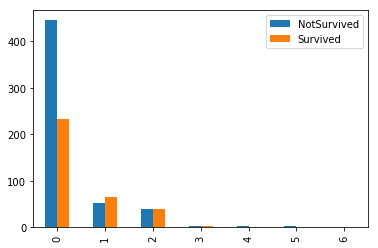

In [22]:
x = DataFrame({"Survived": Series(survived.groupby(['Parch']).size()), "NotSurvived": Series(not_survived.groupby(['Parch']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**Ticket**

**SingleTicketNumber**-Balken-Diagramm

In [23]:
#x = DataFrame({"Survived": Series(survived.groupby(['SingleTicketNumber']).size()), "NotSurvived": Series(not_survived.groupby(['SingleTicketNumber']).size())})
#ax = x.plot(kind='bar')
#patches, labels = ax.get_legend_handles_labels()
#ax.legend(patches, labels, loc='best')

**TicketPrefix**-Balken-Diagramm

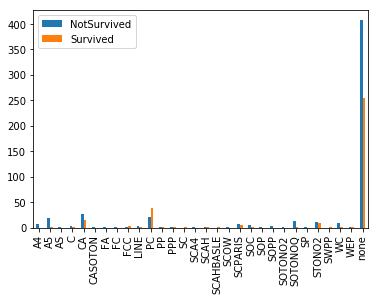

In [24]:
x = DataFrame({"Survived": Series(survived.groupby(['TicketPrefix']).size()), "NotSurvived": Series(not_survived.groupby(['TicketPrefix']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**Fare**-Balken-Diagramm

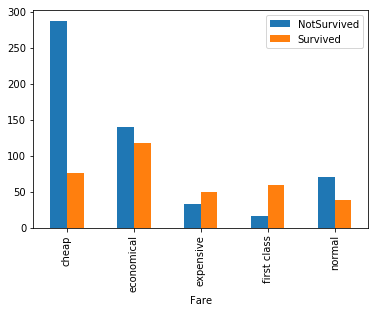

In [25]:
x = DataFrame({"Survived": Series(survived.groupby(['Fare']).size()), "NotSurvived": Series(not_survived.groupby(['Fare']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**Cabin**-Balken-Diagramm

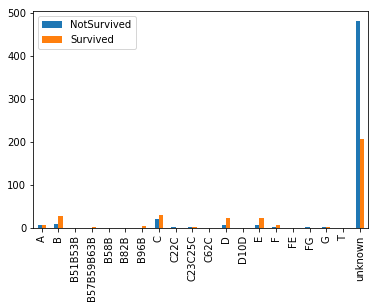

In [26]:
x = DataFrame({"Survived": Series(survived.groupby(['Cabin']).size()), "NotSurvived": Series(not_survived.groupby(['Cabin']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

**Embarked**-Balken-Diagramm

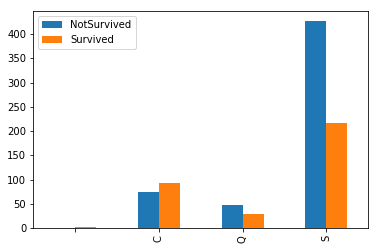

In [27]:
x = DataFrame({"Survived": Series(survived.groupby(['Embarked']).size()), "NotSurvived": Series(not_survived.groupby(['Embarked']).size())})
ax = x.plot(kind='bar')
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

## Klassifizierung

Im Folgenden wird ein Naive-Bayes-Klassifizierer implementiert, der sich mittels eines Trainings-Datensatzes trainieren lässt und anschließend in der Lage ist, nicht bekannte Daten zu klassifizieren. Als Algorithmus wird hier das Bayes' Theorem verwendet.

### Bayes' Theorem

Naive-Bayes-Klassifizierer werden gerne im Bereich des Machine-Learning benutz und gehoren dort zu der Familie der eher einfachen wahrscheinlichkeitstheoretisch Klassifizierern. Der Klassifizierer baut dabei auch das Bayes' Theorem auf. Das Bayes' Theorem lässt sich wie folgt als Formel darstellen:
$$p(c|x) = \frac{p(x|c) * p(c)}{p(x)}$$
Wobei sich p(x|c) wie folgt berechnet:
$$p(x|c) = \prod_{i=1}^{n} p(x_i|c)$$

Zu beachten ist hierbei, dass davon ausgegenagen wird, dass die einzelenen Features (in der Formel x_i) von einander unabhägig sind.

### Naive-Bayes-Klassifizierer

Im folgenden ist eine Klasse implementiert, welche einen Naive-Bayes-Klassifizierer representiert. Dabei wurde die zuvor erwähnte Fromel verwendet, wobei noch ein Smoothing hinzugefügt wurde und mit dem Logarithmus gerechnet wurde, um zu kleine Werte und somit ein Floating-Point-Underflow zu vermeiden. Da man zudem die Teilung duch p(x) weglassen kann, da diese bei allen Berechnungen gleichermaßen passiert, ergibt sich die folgende Formel:

$$p(c|x) = p(x|c) * p(c)$$

Wobei sich p(x|c) wie folgt berechnet:

$$p(x|c) = \sum_{i=1}^{n} log(p(x_i|c))$$

und wobei sich p(x_i|c) wie folgt berechnet:

$$p(x_i|c) = \frac{p(x_i \bigwedge c) + 1}{p(c) + m}$$

Diese Formel ist so auch in dem Klassifizierer implementiert. Folgende Methoden sind in der Klasse NaiveBayesClassifier enthalten:
1. **init**: Macht lediglich eine Konsolen-Ausgabe, um zu zeigen, dass ein Instanz erzeugt wurde
2. **train**: Trainiert den Klassifizierer. Dabei wird zum einen der übergebene Trainigs-Datensatz abgespeichert und verschiedene Werte vorberechnet. Vorberechente Werte sind: ein Array, besthend aus allen verschiedenen Klassen, die Anzahl der Instanzen mit einer bestimmten Klasse, die Wahrscheinlichkeiten, das eine Instanz eine bestimmte Klasse hat und zu jedem, unterschidlichen Feature, die Anzahl von unterschiedlichen Ausprägungen eines Features
3. **classify**: Klassifiziert Instanzen mit hilfe des zuvor dargestellten Bayes' Theorems. Rückgabewert ist die Klasse, mit der höchsten Wahrscheinlichkeit
4. **accuracy**: Berechnet den Accuracy-Wert des Klassifizierers
5. **recall**: Berechnet den Recall-Wert des Klassifizierers
6. **fpRate**: Berechnet die FP-Rate des Klassifizierers
7. **precision**: Berechnet den Precision-Wert des Klassifizierers
8. **f1Score**: Berechnet den F1-Score des Klassifizierers



In [28]:
class NaiveBayesClassifier:
    
    def __init__(self):
            print('New Naive Bayes Classifier initalized...')
            
    def train(self, train_set):
        self.train_set = DataFrame(train_set)
        
        self.classes = np.unique(self.train_set['Class'].values.ravel())
        
        self.all_instances_with_class = {}
        self.probability_of_classes = {}
        for class_ in self.classes:
            self.all_instances_with_class[class_] = self.train_set.groupby(['Class']).size().loc[class_]
            self.probability_of_classes[class_] = self.all_instances_with_class[class_] / self.train_set.shape[0]
        
        self.number_of_different_forms_of_features = {}
        for feature in self.train_set.keys():
            self.number_of_different_forms_of_features[feature] = self.train_set.groupby([feature]).size().count()

        
    def classify(self, instance):
        probabilities_of_classes_provided_by_features = {}
        
        for class_ in self.classes:
            # Frage: Sollte nicht auch von self.probability_of_classes[class_] der Logarithmus genommen werden?
            probability_of_class_provided_by_features = log(self.probability_of_classes[class_])
            probability_of_features_provided_by_class = 0
            
            for feature in instance:
                if feature != 'Class' :
                    try:
                        all_instances_with_class_and_feature = self.train_set.groupby(['Class', feature]).size().loc[class_].loc[instance[feature]]
                    except KeyError:
                        all_instances_with_class_and_feature = 0
                
                    probability_of_features_provided_by_class += log((all_instances_with_class_and_feature + 1) / (self.all_instances_with_class[class_] + self.number_of_different_forms_of_features[feature]))
            
            probability_of_class_provided_by_features += probability_of_features_provided_by_class
            probabilities_of_classes_provided_by_features[class_] = probability_of_class_provided_by_features
        
        best_class = max(probabilities_of_classes_provided_by_features, key=probabilities_of_classes_provided_by_features.get)
            
        return best_class

    def accuracy(self, test_set):
        tp_tn = 0
        for instance in test_set:
            result = self.classify(instance)
            if result == instance['Class']:
                tp_tn += 1
        return tp_tn / DataFrame(test_set).shape[0]
    
    def recall(self, test_set):
        tp = 0
        for instance in test_set:
            result = self.classify(instance)
            if result == instance['Class'] and instance['Class'] == 1:
                tp += 1
        return tp / DataFrame(test_set).groupby(['Class']).size().loc[1]
    
    def fpRate(self, test_set):
        fp = 0
        for instance in test_set:
            result = self.classify(instance)
            if result != instance['Class'] and instance['Class'] == 0:
                fp += 1
        return fp / DataFrame(test_set).groupby(['Class']).size().loc[0]
    
    def precision(self, test_set):
        tp = 0
        fp = 0
        for instance in test_set:
            result = self.classify(instance)
            if result == instance['Class'] and instance['Class'] == 1:
                tp += 1
            elif result != instance['Class'] and instance['Class'] == 0:
                fp += 1
        return tp /(tp + fp)
    
    def f1Score(self, test_set):
        precision = self.precision(test_set)
        recall = self.recall(test_set)
        return (2 * precision * recall)/(precision + recall)

### Der Klassifizierer in Kombination mit der Feature-Extraktions-Methode features

1. **Trainieren und Testen**

1.1. **Vorberitung der Datensätze**

Als erstes werden der Trainings- und Development-Datensatz vorbereitet. Der Trainings-Datensatz soll dabei vom Development-Datensatz verschiedene Daten beinhalten, um so auch einschätzen zu können, ob der Klassifizierer gut funktioniert. Größe des Development-Datensatz soll bei min. 100 Instanzen liegen.

In [29]:
train_dict = csv.DictReader(open('train.csv', 'r'))
train_set = ([features(p, True) for p in train_dict])
size = int(len(train_set) * 0.12)
train_set, dev_set = train_set[size:], train_set[:size]

1.2. ** Trainieren des Klassifizierers **

Als nächstest wird der Klassifizierer mit dem Trainings-Datensatz trainiert.

In [30]:
nbc = NaiveBayesClassifier()
nbc.train(train_set)

New Naive Bayes Classifier initalized...


1.3. ** Testen des Klassifizierers **

Zu guter Letzt wird der Klassifizierer mit dem Development-Datensatz und folgenden Methoden überprüft:
* accuracy
* recall
* fpRate
* precision
* f1Score

In [32]:
print('Accuracy: ', nbc.accuracy(dev_set))
print('Recall: ', nbc.recall(dev_set))
print('FP-Rate: ', nbc.fpRate(dev_set))
print('Precision: ', nbc.precision(dev_set))
print('F1-Score: ', nbc.f1Score(dev_set))

Accuracy:  0.7169811320754716
Recall:  0.634146341463
FP-Rate:  0.230769230769
Precision:  0.6341463414634146
F1-Score:  0.634146341463


2.. ** Klassifizieren von unbekannten Daten **

2.1. **Vorberitung der Datensätze**

Als erstes werden der Trainings- und Test-Datensatz vorbereitet. Der Trainings-Datensatz wird diesmal komplett (ohne zusäzlichen Development-Datensatz) zum trainieren des Klassifizieres benutzt. Der Test-Datensatz beinhaltet die Daten welche fremd sind und klassifiziert werden sollen.

In [33]:
train_dict = csv.DictReader(open('train.csv', 'r'))
train_set = ([features(p, True) for p in train_dict])

test_dict = csv.DictReader(open('test.csv', 'r'))

2.2. ** Trainieren des Klassifizierers **

Als nächstest wird der Klassifizierer mit dem Trainings-Datensatz trainiert.

In [34]:
nbc = NaiveBayesClassifier()
nbc.train(train_set)

New Naive Bayes Classifier initalized...


2.3 ** Klassifizieren der fremden Daten **

Als letztes werden alle Instanzen des Test-Datensatzes klassifiziert und das Ergebnis wird in eine CSV-Datei geschreiben.

In [35]:
with open('submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['PassengerId', 'Survived'])
    
    for passanger in test_dict:
        passanger_features = features(passanger, False)
        class_ = nbc.classify(passanger_features)
        writer.writerow([passanger['PassengerId'], str(class_)])

### Der Klassifizierer in Kombination mit der Feature-Extraktions-Methode randomFeatures

1. **Trainieren und Klassifizieren mittels Ensemble-Klassifizierung**

Da es nicht sehr effektiv wäre die Feature-Extraktions-Methode randomFeatures nur für einmaliges Klassifizieren zu benutzen und wahrscheinlich in vielen Fällen zu schlechteren Ergebnissen führen würde, als die Methode features, wird hier eine Art Ensemble-Klassifizierer implementiert. Dabei werden mehrere Klassifizierer verwendet, wobei jeder einzelne eine Instanz auf Grund von unterschiedlichen Features einer Klassse zuordnet. Sofern der Klassifizierer einen höheren Accuracy-Wert als 0.7 hat (eigentlich würden 0.5 reichen, aber es wurde sich hier für einen höheren Wert entscheiden) wird sein Ergebnis, also die Klasse, in das endgültige Ergebnis mit einberechnet. Am Ende wird dann zusammengezählt, wie oft eine bestimmte Klasse ausgewählt wurde und die, die am häufigsten auftaucht wird dann als Endergebnis genommen.

In [38]:
selected_classes_for_instances_from_all_classifiers = []

for i in range(100):
    
    random_number = randint(3,10)
    random_numbers = []
    for j in range(random_number):
        tmp_random_number = randint(0,11)
        random_numbers.append(tmp_random_number)
    
    train_dict = csv.DictReader(open('train.csv', 'r'))
    train_set = ([randomFeatures(p, random_numbers, True) for p in train_dict])
    size = int(len(train_set) * 0.12)
    train_set, dev_set = train_set[size:], train_set[:size]
    
    nbc = NaiveBayesClassifier()
    nbc.train(train_set)
    accuracy = nbc.accuracy(dev_set) 
   
    print('With accuracy: ', accuracy)
    print('With features:', DataFrame(train_set).keys())
    
    if accuracy > 0.7:
        
        train_dict = csv.DictReader(open('train.csv', 'r'))
        train_set = ([randomFeatures(p, random_numbers, True) for p in train_dict])
        
        nbc = NaiveBayesClassifier()
        nbc.train(train_set)

        test_dict = csv.DictReader(open('test.csv', 'r'))

        for instance in test_dict:
            instance_features = randomFeatures(instance, random_numbers, False)
            selected_classes_for_instances_from_all_classifiers.append({'PassengerId': instance['PassengerId'], 'Class': nbc.classify(instance_features)})
            
if len(selected_classes_for_instances_from_all_classifiers) > 0:
    grouped_and_counted_classes_for_instances = DataFrame(selected_classes_for_instances_from_all_classifiers).groupby(['PassengerId', 'Class']).size()

2.. **Speichern des Ergebnisses**

Zu guter Letzt wird das Ergbeniss noch im richtigen Format in einem CSV-File gespeichert.

In [37]:
if len(selected_classes_for_instances_from_all_classifiers) > 0:
    with open('submission_random_features.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(['PassengerId', 'Survived'])
    
        test_dict = csv.DictReader(open('test.csv', 'r'))
    
        for instance in test_dict:
            try:
                not_survived = grouped_and_counted_classes_for_instances.loc[instance['PassengerId'], 0]
            except Exception:
                not_survived = 0
            try:
                survived = grouped_and_counted_classes_for_instances.loc[instance['PassengerId'], 1]
            except Exception:
                survived = 0
            if not_survived > survived:
                writer.writerow([instance['PassengerId'], str(0)])
            else:
                writer.writerow([instance['PassengerId'], str(1)])